Muestra todo lo que se ha podido hacer con el dataset mnist

In [1]:
from demo_utils.demo10 import Demo10
#from demo_utils.general import SUPPORTED_DATASETS
#from IPython.display import Markdown as md
from demo_utils.get_hyper_params import get_hyper_params

In [2]:
testing_dataset = 'mnist'
# model_name = 'dt'
# box_type = 'none'
# sampler_name = 'rbf'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
d10 = Demo10()

In [6]:
d10_data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': (500, 501),
#     'models': [{'model_name': model_name,
#                 'sampler_name': 'identity',
#                 'sampler_gamma': None,
#                 'model_params': {},
#                 #'box_type': 'none',
#                 'box_type': box_type,
#                 'n_estim': None,
#                 'pca': False,
#                 'pca_first': False},
#               {'model_name': model_name,
#                 'sampler_name': 'identity',
#                'sampler_gamma': None,
#                'model_params': {},
#                 #'box_type': 'none',
#                 'box_type': box_type,
#                 'n_estim': None,
#                 'pca': True,
#                 'pca_first': False},
#               {'model_name': model_name,
#                 'sampler_name': sampler_name,
#                'sampler_gamma': None,
#                'model_params': {},
#                 #'box_type': 'none',
#                 'box_type': box_type,
#                 'n_estim': None,
#                 'pca': False,
#                 'pca_first': False},
#               {'model_name': model_name,
#                 'sampler_name': sampler_name,
#                'sampler_gamma': None,
#                'model_params': {},
#                 #'box_type': 'none',
#                 'box_type': box_type,
#                 'n_estim': None,
#                 'pca': True,
#                 'pca_first': True},
#               {'model_name': model_name,
#                 'sampler_name': sampler_name,
#                'sampler_gamma': None,
#                'model_params': {},
#                 #'box_type': 'none',
#                 'box_type': box_type,
#                 'n_estim': None,
#                 'pca': True,
#                 'pca_first': False},],
    'rbfsampler_gamma': 'UNUSED',
    'nystroem_gamma': 'UNUSED',
    'hparams': {'dt': {'max_depth': None,
                       'min_samples_split': 2,
                       'min_samples_leaf': 1,
                       'min_weight_fraction_leaf': 0.0,
                       'max_leaf_nodes': None,
                       'min_impurity_decrease': 0.0},
                'logit': {'C': 1000.0},
                'linear_svc': {'C': 5}}
}


In [7]:
def get_a_model(model_name, sampler_name, pca, pca_first=False):
    box_type = 'none'
    n_estim = None
    # más adelante habrá que soportar distintas box

    #     {'model_name': model_name,
    #      'sampler_name': 'identity',
    #      'sampler_gamma': None,
    #      'model_params': {},
    #      # 'box_type': 'none',
    #      'box_type': box_type,
    #      'n_estim': None,
    #      'pca': False,
    #      'pca_first': False}

    ret_dic = {'model_name': model_name,
               'sampler_name': 'identity',
               'sampler_gamma': None,
               'model_params': {},
               # 'box_type': 'none',
               'box_type': box_type,
               'n_estim': n_estim,
               'pca': pca,
               'pca_first': pca_first}
    if pca == False:
        calculed_pca = 'no_pca'
    elif pca_first:
        calculed_pca = 'pca_first'
    elif not pca_first:
        calculed_pca = 'pca_last'

    if sampler_name not in ['rff', 'nystroem'] and pca:
        calculed_pca = 'pca'

    hyper_params = get_hyper_params(dts_name=testing_dataset, box_name=box_type,
                                    model_name=model_name, sampler_name=sampler_name, pca=calculed_pca)
    gamma = hyper_params.pop('gamma', None)
    ret_dic['sampler_gamma'] = gamma
    ret_dic['model_params'] = hyper_params
    
    if sampler_name == 'rff':
        ret_dic['sampler_name'] = 'rbf'
    elif sampler_name == 'nystroem':
        ret_dic['sampler_name'] = 'nystroem'
    
    
    return ret_dic

In [8]:
def test_dt_rff(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'dt'
    sampler_name = 'rff'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

def test_logit_rff(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'logit'
    sampler_name = 'rff'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

def test_linear_svc_rff(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'linear_svc'
    sampler_name = 'rff'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

In [9]:
def test_dt_nystroem(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'dt'
    sampler_name = 'nystroem'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

def test_logit_nystroem(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'logit'
    sampler_name = 'nystroem'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

def test_linear_svc_nystroem(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    model_name = 'linear_svc'
    sampler_name = 'nystroem'
    # dt solo, dt solo con pca, dt, y los 3 pca con rff
    
    m1 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=False)
    m2 = get_a_model(model_name=model_name, sampler_name='no_sampler', pca=True)
    m3 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=False)
    m4 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=True)
    m5 = get_a_model(model_name=model_name, sampler_name=sampler_name, pca=True, pca_first=False)
    
    models = [m1, m2, m3, m4, m5,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

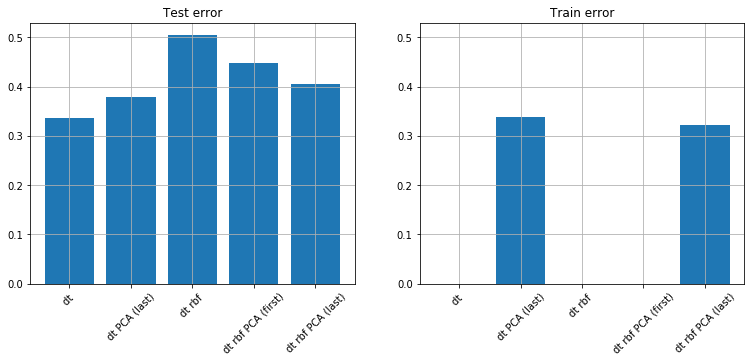

In [10]:
test_dt_rff(d10_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

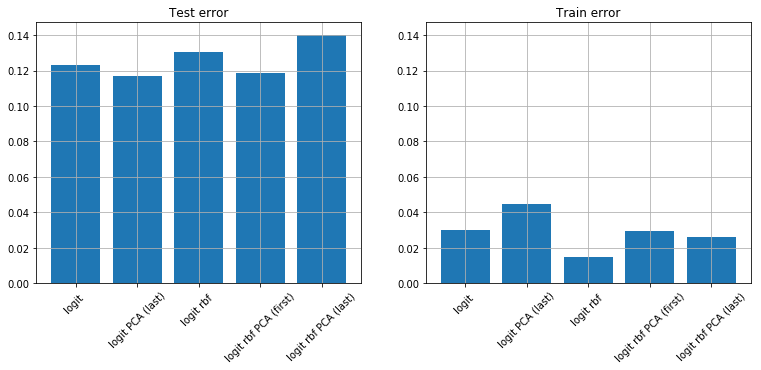

In [11]:
test_logit_rff(d10_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

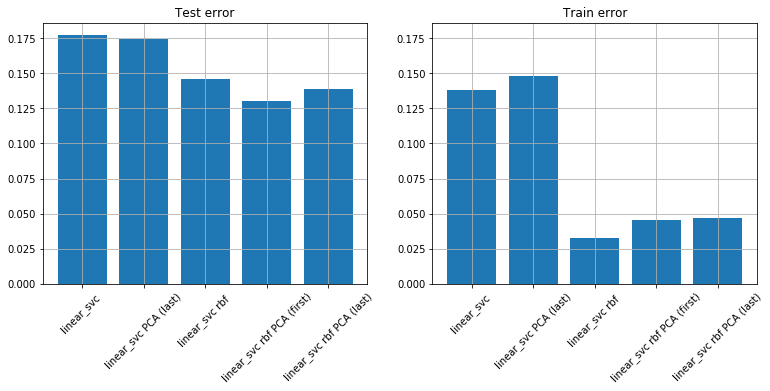

In [12]:
test_linear_svc_rff(d10_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

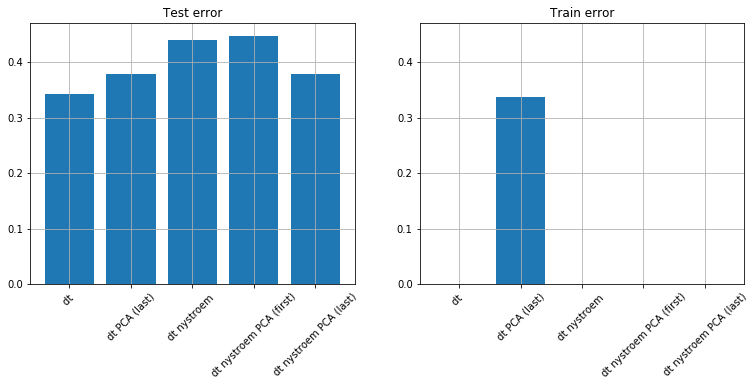

In [13]:
test_dt_nystroem(d10_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

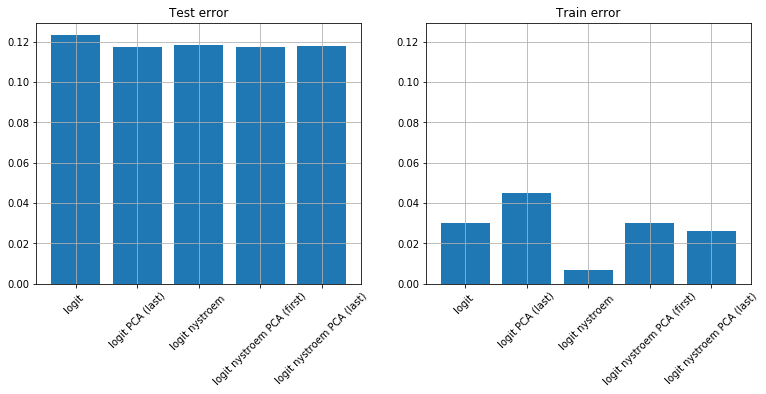

In [14]:
test_logit_nystroem(d10_data)

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

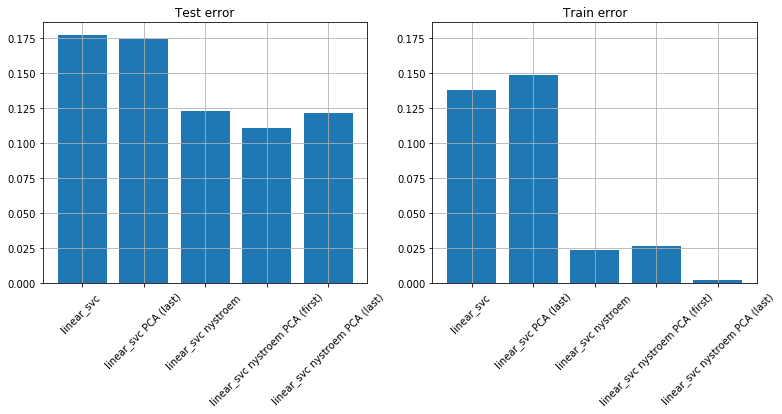

In [15]:
test_linear_svc_nystroem(d10_data)